## **Description**
This notebook demonstrates the implementation of sequential merge sort and parallel merge sort, providing a comparison of execution times between the two methods.

## **Sequential merge sort**
*Basic idea*: in sequential merge sort, the sorting process is done in a single thread or process.

1/ Recursively divides the array into halves until each sub-array has one element.

2/ Merges sorted sub-arrays back together.

In [ ]:
# Sequential_merge_sort function with one parameter (the initial array)
# follows the divide-and-conquer strategy to recursively divide the input array into smaller sub-arrays.
def sequential_merge_sort(array):
  len_of_arr = len(array)
  # Base case: If the array has only one element, it's already sorted
  if len_of_arr == 1:
    return array
  # Calculate the midpoint index to divide the array into two parts
  mid_idx = len_of_arr // 2
  # Recursively divide the array into the left and right
  left_arr = sequential_merge_sort(array[:mid_idx])
  right_arr = sequential_merge_sort(array[mid_idx:])
  # Merge the sorted left and right sub-arrays using merge_sorted_arrays function
  return merge_sorted_arrays(left_arr, right_arr)

In [ ]:
# Merge_sorted_arrays function with two parameters (first array and second array)
# describes how to merge two sub-arrays in ascending order.
def merge_sorted_arrays(array_1, array_2):
  result_array = [] #the merged result
  len_of_arr_1 = len(array_1)
  len_of_arr_2 = len(array_2)
  idx_1 = 0
  idx_2 = 0
  # Compare elements from both arrays and merge them in ascending order
  while idx_1 < len_of_arr_1 and idx_2 < len_of_arr_2:
    # If the element in array_1 is smaller,
    # append it to the result and move the index in array_1
    if array_1[idx_1] < array_2[idx_2]:
      result_array.append(array_1[idx_1])
      idx_1 += 1
    # If the element in array_2 is smaller or equal,
    # append it to the result and move the index in array_2
    else:
      result_array.append(array_2[idx_2])
      idx_2 += 1
  # Append any remaining elements from array_1 (if any)
  while idx_1 < len_of_arr_1:
    result_array.append(array_1[idx_1])
    idx_1 += 1
  # Append any remaining elements from array_2 (if any)
  while idx_2 < len_of_arr_2:
    result_array.append(array_2[idx_2])
    idx_2 += 1
  return result_array # Return the merged and sorted result array

## **Parallel merge sort**
*Basic idea*: Parallel merge sort is designed to take advantage of multiple processors or cores in a computer system. It distributes the sorting and merging tasks across multiple threads or processes, allowing multiple parts of the array to be sorted simultaneously. Once the smaller sub-arrays are sorted, they are merged in parallel to achieve faster sorting times.

In [ ]:
import multiprocessing as mp

def parallel_merge_sort(array):
  num_of_processes = mp.cpu_count() # the number of available cpu processes
  len_of_array = len(array)
  # If the array is smaller than the number of available processes, use sequential merge sort
  if len_of_array < num_of_processes:
    return sequential_merge_sort(array)
  len_of_chunk = len_of_array // num_of_processes # the chunk size for dividing the array among processes

  # Divide the input array into chunks
  chunks = [array[idx : min(idx + len_of_chunk, len_of_array)] for idx in range(0, len_of_array, len_of_chunk)]
  # Create multiple processes to perform sequential merge sort on each chunk
  pool = mp.Pool(processes = num_of_processes)
  # Apply sequential merge sort to each chunk using multiprocessing
  results_of_chunk = pool.map(sequential_merge_sort, chunks)
  result = [] # the result array
  # Merge the sorted chunks back together
  for sub_result in results_of_chunk:
    result = merge_sorted_arrays(result, sub_result)
  return result

## **Measure execution time for each algorithm**

  Length of array    Sequential merge sort time (s)    Parallel merge sort time (s)
-----------------  --------------------------------  ------------------------------
                1                       3.09944e-06                     9.67979e-05
                3                       1.09673e-05                     0.0299716
               10                       3.05176e-05                     0.0235894
               30                       6.7234e-05                      0.0312216
              100                       0.00030756                      0.0235088
              300                       0.000791311                     0.0241296
             1000                       0.00289631                      0.0268481
             3000                       0.0101073                       0.0367005
            10000                       0.0363932                       0.0644937
            30000                       0.14345                         0.164173
           

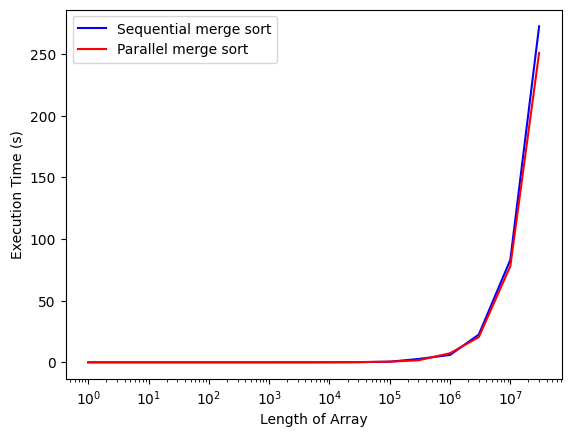

In [ ]:
import time
import random
from tabulate import tabulate
import matplotlib.pyplot as plt

# Test on different lengths of array
len_to_test = [1, 3, 10, 30, 100, 300, 1000, 3000, 10000, 30000, 100000, 300000, 1000000, 3000000, 10000000, 30000000]
time_for_sequential = []
time_for_parallel = []
for len_of_array in len_to_test:
  random.seed(12)
  array = [random.randint(0, len_of_array) for _ in range(len_of_array)] # A random array of the specified length
  # Measuring the time for executing sequential merge sort
  start_time = time.time()
  _ = sequential_merge_sort(array)
  end_time = time.time()
  time_for_sequential.append(end_time - start_time)
  # Measuring the time for executing parallel merge sort
  start_time = time.time()
  _ = parallel_merge_sort(array)
  end_time = time.time()
  time_for_parallel.append(end_time - start_time)
# Print out the result
print(tabulate(list(zip(len_to_test, time_for_sequential, time_for_parallel)),
               headers = ['Length of array', 'Sequential merge sort time (s)', 'Parallel merge sort time (s)']))
# Plot the result
plt.semilogx(len_to_test, time_for_sequential, color = 'blue', label = 'Sequential merge sort')
plt.semilogx(len_to_test, time_for_parallel, color = 'red', label = 'Parallel merge sort')
plt.xlabel('Length of Array')
plt.ylabel('Execution Time (s)')
plt.legend(loc = 'upper left')
plt.show()